In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [8]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [9]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-07-28
data: (309, 72)
pairs: (1931, 12)


In [10]:
def loss_own(y, x, volume, period, desv_stop=3.1, price_input_test=0, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    volume = abs(volume)
    if (price_input_test <= 0):
        price_input_test=y_test[0]
    
    price_stop_loss, residue = loss_own_residue(y_test, x_test, period, desv_stop=desv_stop, y_short=y_short)
    return -abs(((price_input_test*volume)-(price_stop_loss*volume)))

def loss_own_residue(y, x, period, desv_stop=3.1, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    last_price = y_test[0].copy()
    penny = 0
    while (True):
        penny=round(penny + 0.01, 2)
        if (y_short):
            y_test[0] = last_price + penny
        else:
            y_test[0] = last_price - penny

        residue = mult.zscore(mult.residue(y_test, x_test, period))
        if(abs(residue[0]) >= desv_stop):
            break
    return y_test[0], residue

def gain_own(y, x, volume, period, price_input_test=0, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    volume = abs(volume)
    if (price_input_test <= 0):
        price_input_test=y_test[0]
    
    price_take_profit, residue = gain_own_residue(y_test, x_test, period, y_short=y_short)
    return abs(((price_input_test*volume)-(price_take_profit*volume)))

def gain_own_residue(y, x, period, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    last_price = y_test[0].copy()
    penny = 0
    while (True):
        penny=round(penny + 0.01, 2)
        if (y_short):
            y_test[0] = last_price - penny
            residue = mult.zscore(mult.residue(y_test, x_test, period))
            if(residue[0] <= 0):
                break
        else:
            y_test[0] = last_price + penny
            residue = mult.zscore(mult.residue(y_test, x_test, period))
            if(residue[0] >= 0):
                break

    return y_test[0], residue

In [12]:
"""y_symbol = 'ELET3'
x_symbol = 'PCAR3'"""

"""y_symbol = 'CMIG4'
x_symbol = 'ENGI11'"""

y_symbol = 'BRKM5'
x_symbol = 'LAME4'

y = data[y_symbol]
x = data[x_symbol]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


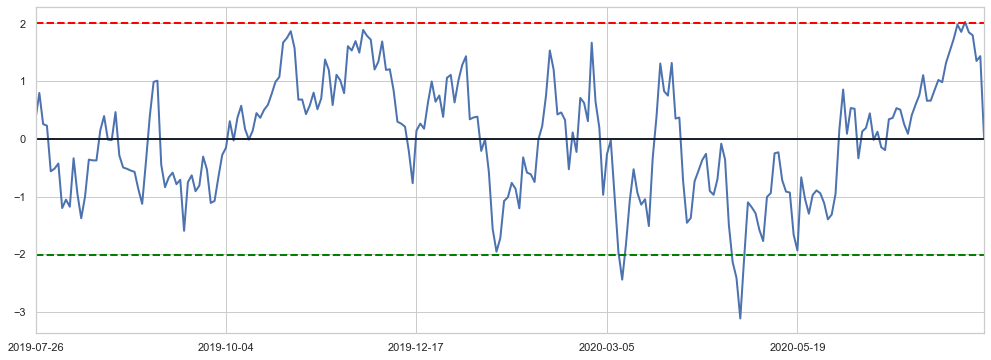

In [13]:
y_rest, resid = gain_own_residue(data['BBAS3'], data['TAEE11'], 250)
mult.plot_residue(resid)